### Pytorch overview

python new_project.py {프로젝트명} # 프로젝트 새로 생성

python train.py -c config.json # MNIST dataset을 다운받아 실행까지 진행하게 된다

ngrok을 통해 colab과도 연동이 가능하다!

## Auto_grad Optimizer

딥러닝은 레이어의 연속이다!
- 이를 만들기 위한 torch의 가장 기본적인 class = nn.Module

- 딥러닝을 구성하는 layer의 base class
- input, output, forward, backward 정의
- 학습의 대상이 되는 파라미터 (tensor) 정의

### nn.Parameter
- 학습의 대상이 되는 가중치 값을 Parameter 클래스 안에 정의해준다
- Tensor 객체의 상속 객체
- nn.Module 내에 attribute가 될 때는 required_grad=True로 지정되어 학습 대상이 되는 Tensor
  - 즉, gradient를 계산할 수 있는 걸로 자동으로 지정되어 auto gradient의 대상이 된다.
- 우리가 직접 지정할 일은 잘 없다 -> 대부분의 레이어에는 가중치 값들이 정해져 있기 때문에

autograd_and_optimizer 참조

### Backward
- Layer에 있는 파라미터들의 미분을 수행
- Forward의 결과겂 (model의 output, 예측치)와 실제값간의 차이 (loss)에 대해 미분을 수행
  - 자동 미분 (requires_grad=True)으로 인해 연산이 되고 이때 backward라는 함수가 호출이 되면서 일어나게 된다
- 해당 값으로 파라미터 업데이트


### Backward from the scratch
- 실제 backward는 모듈 단계에서 직접 지정이 가능하다
- 모듈에서 backward와 optimizer 오버라이딩

## Dataset, dataloader

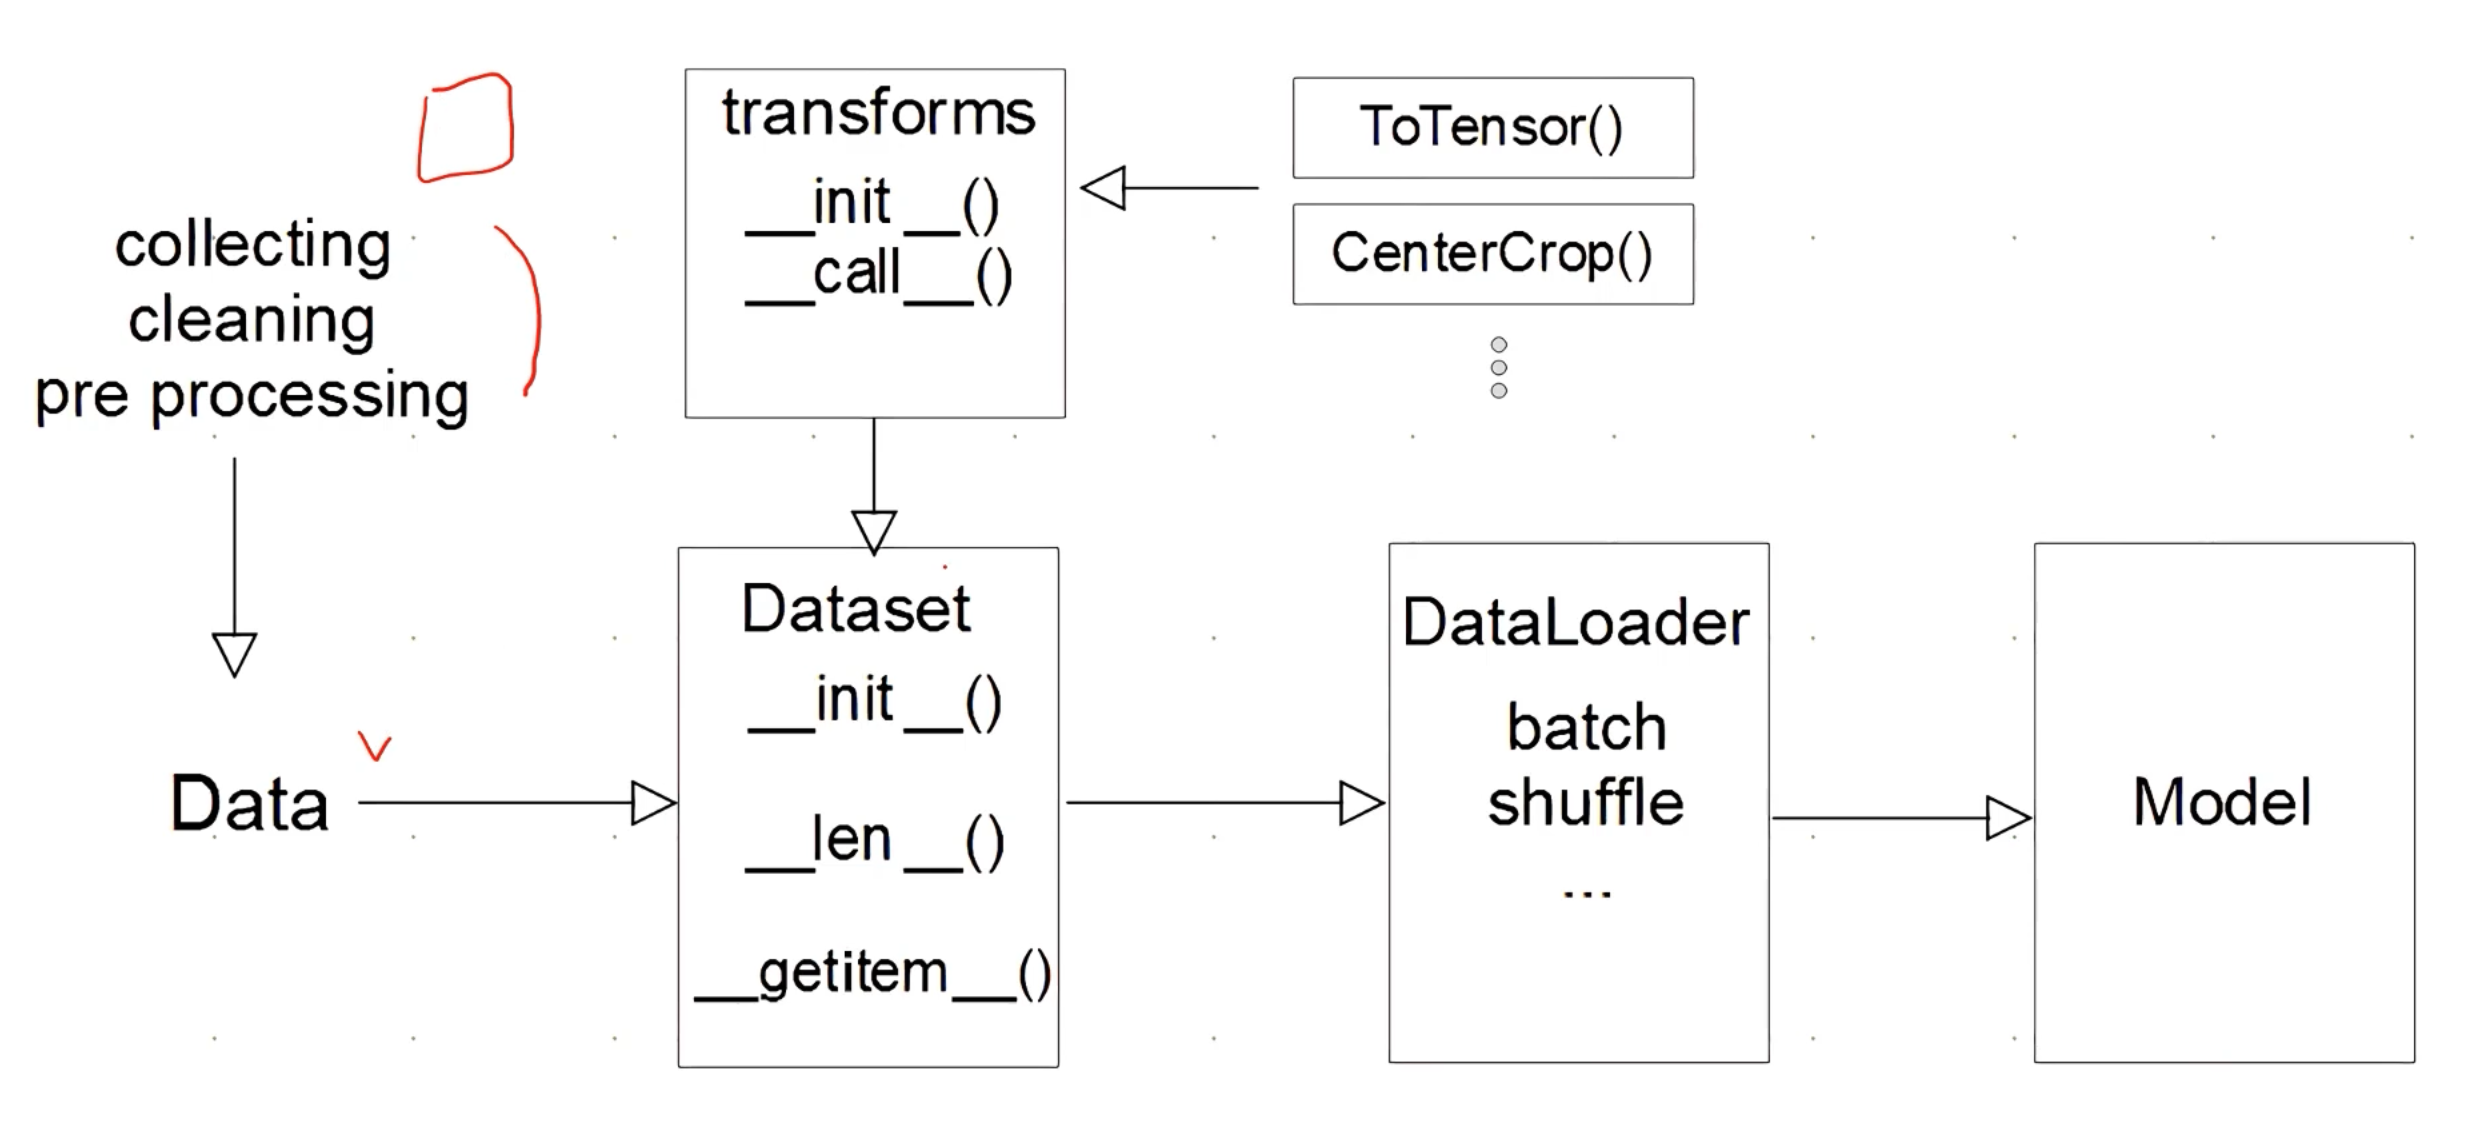

- Dataset
  - map_style : 어떤 데이터 스타일로 반환해줄 것인지 정의
- Transforms
  - 데이터 변형, 데이터 전처리, 데이터 tensor로 변환하는 과정 (ToTensor)
- DataLoader : 배치를 만들어주거나, 데이터 shuffle을 만드는 등 최종적으로 모델의 데이터가 들어갈 때 해당 Dataloader을 통해 생성된 데이터들이 들어간다

### dataset
- 데이터 입력 형태를 정의하는 클래스
- 데이터를 입력하는 방식의 표준화
- Image, Text, Audio 등에 따라 다른 입력 정의
- 하나의 데이터에 대해 정의를 하고 모든 데이터에 대해 적용하는 것

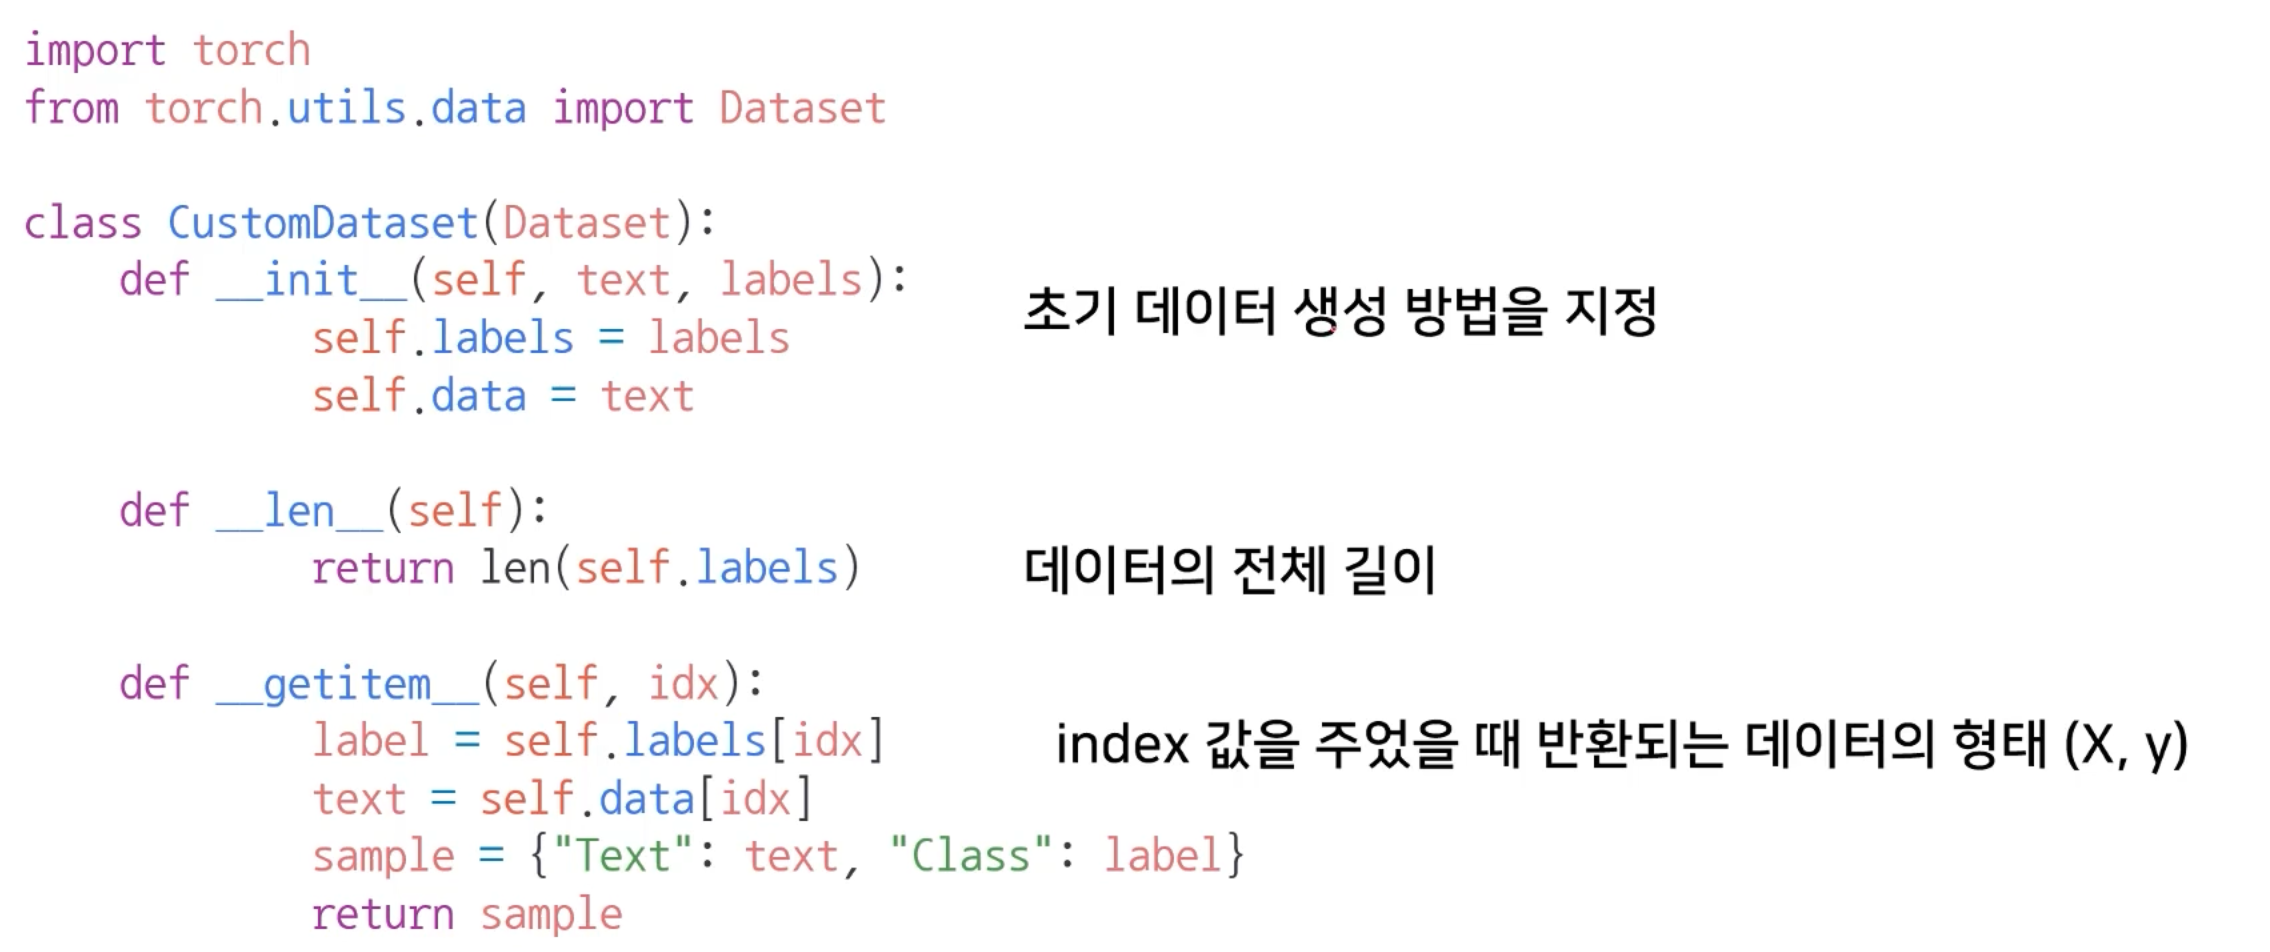

- init : 데이터의 경로를 정의

데이터셋 클래스 생성시 유의점
- 데이터 형태에 따라 각 함수를 다르게 정의한다
- 모든 것을 데이터 생성 시점에 처리하는 것이 아닌 필요한 시점에 변환을 한다
  - CPU에서는 Tensor로 변환해주고, GPU에서 Tensor로 변환된 거를 받아서 처리
- 데이터 셋에 대한 표준화된 처리 방법 제공 필요
- 최근에는 허깅페이스 등 표준화된 라이브러리 사용

### DataLoader
- data의 batch를 생성해주는 클래스
- 학습 직전 데이터의 변환을 책임
- Tensor로 변환 + Batch 처리가 메인 업무
- 병렬적인 데이터 전처리 코드의 고민 필요

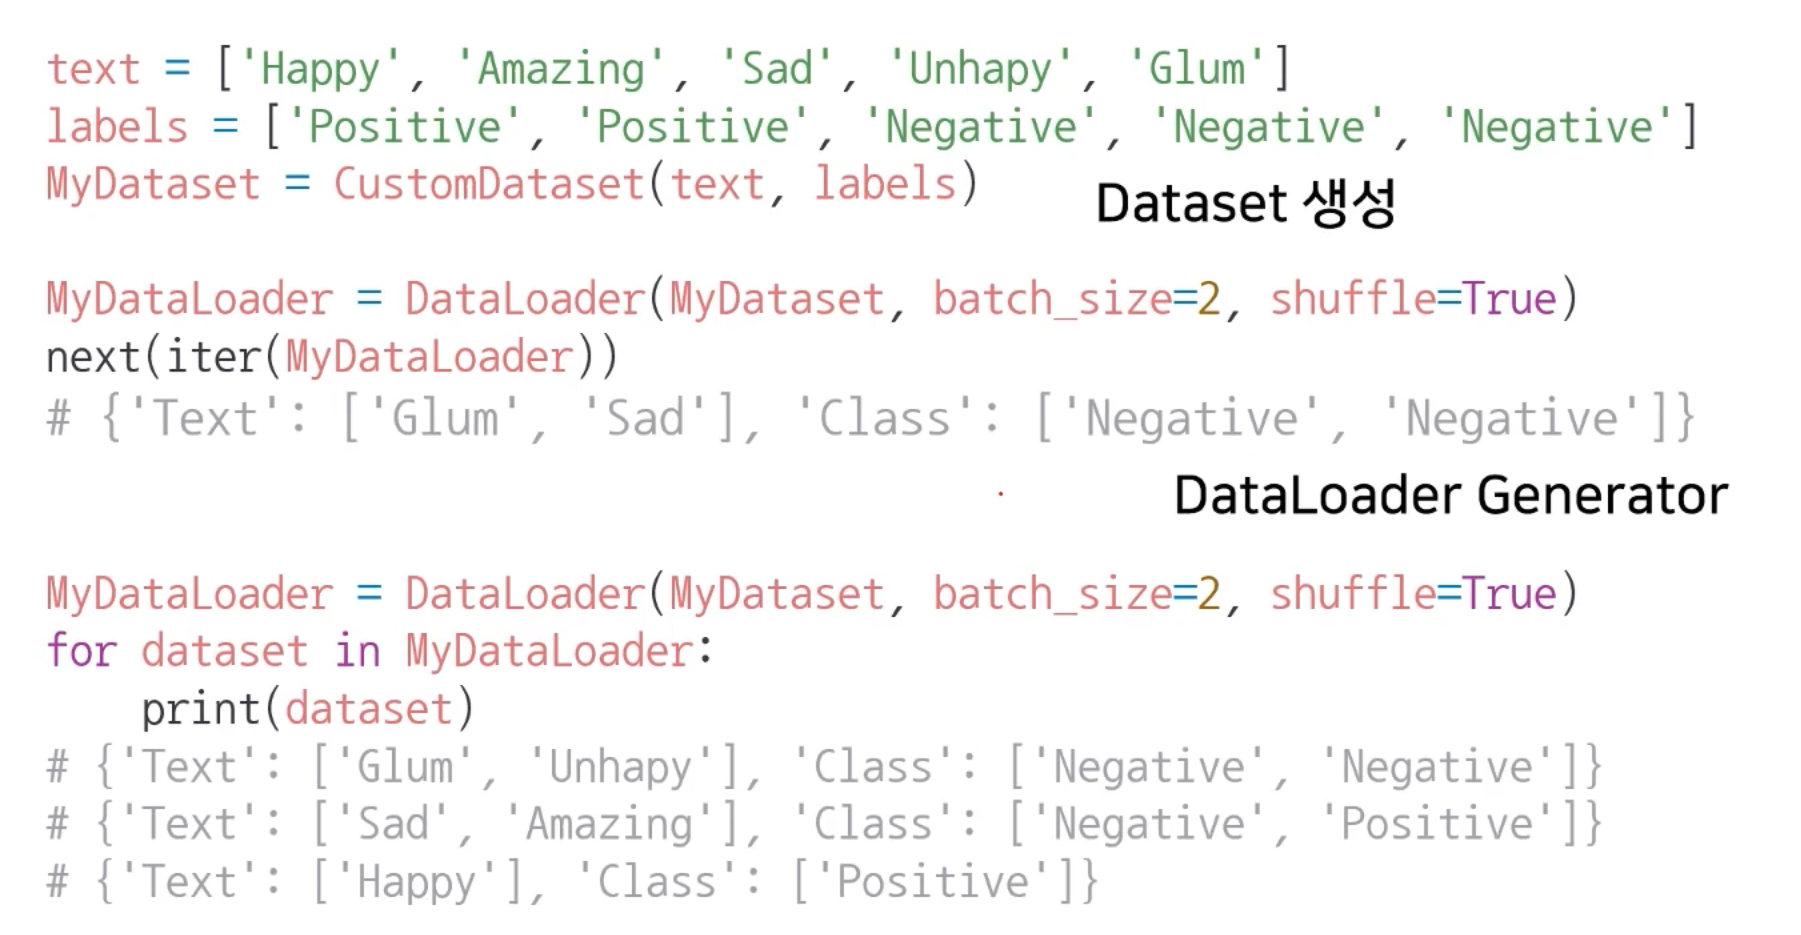

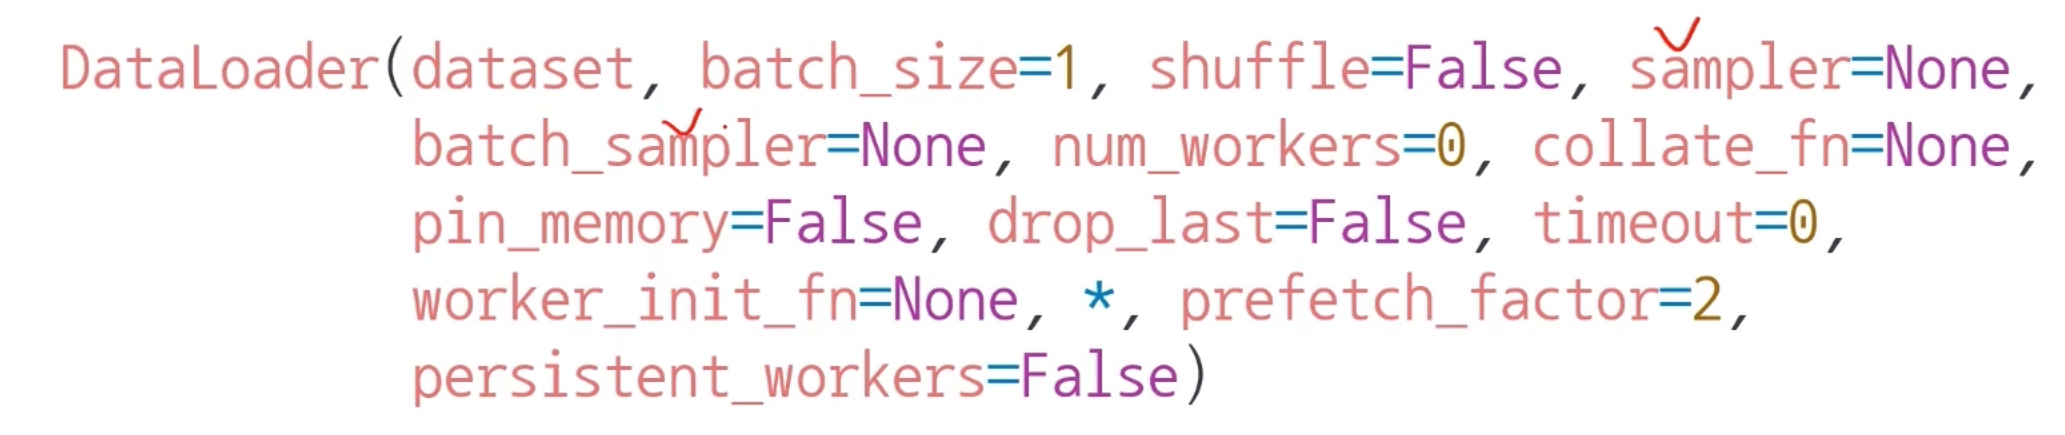

- sampler : sample 데이터를 어떻게 뽑을지 index를 정해주는 기법
- collate_fn : 배치사이즈를 충족하지 못한 데이터셋들의 나머지 부분을 채워주는 것

### model_loading export

model.save()
- 학습의 결과를 저장하기 위한 함수
  - 학습의 결과를 저장하는 두 가지 방법 : 모델 형태 & 파라메터
- 모델 학습 중간 과정의 저장을 통해 최선의 결과모델을 선택함
- 만들어진 모델을 외부 연구자와 공유하여 학습 재연성 향상

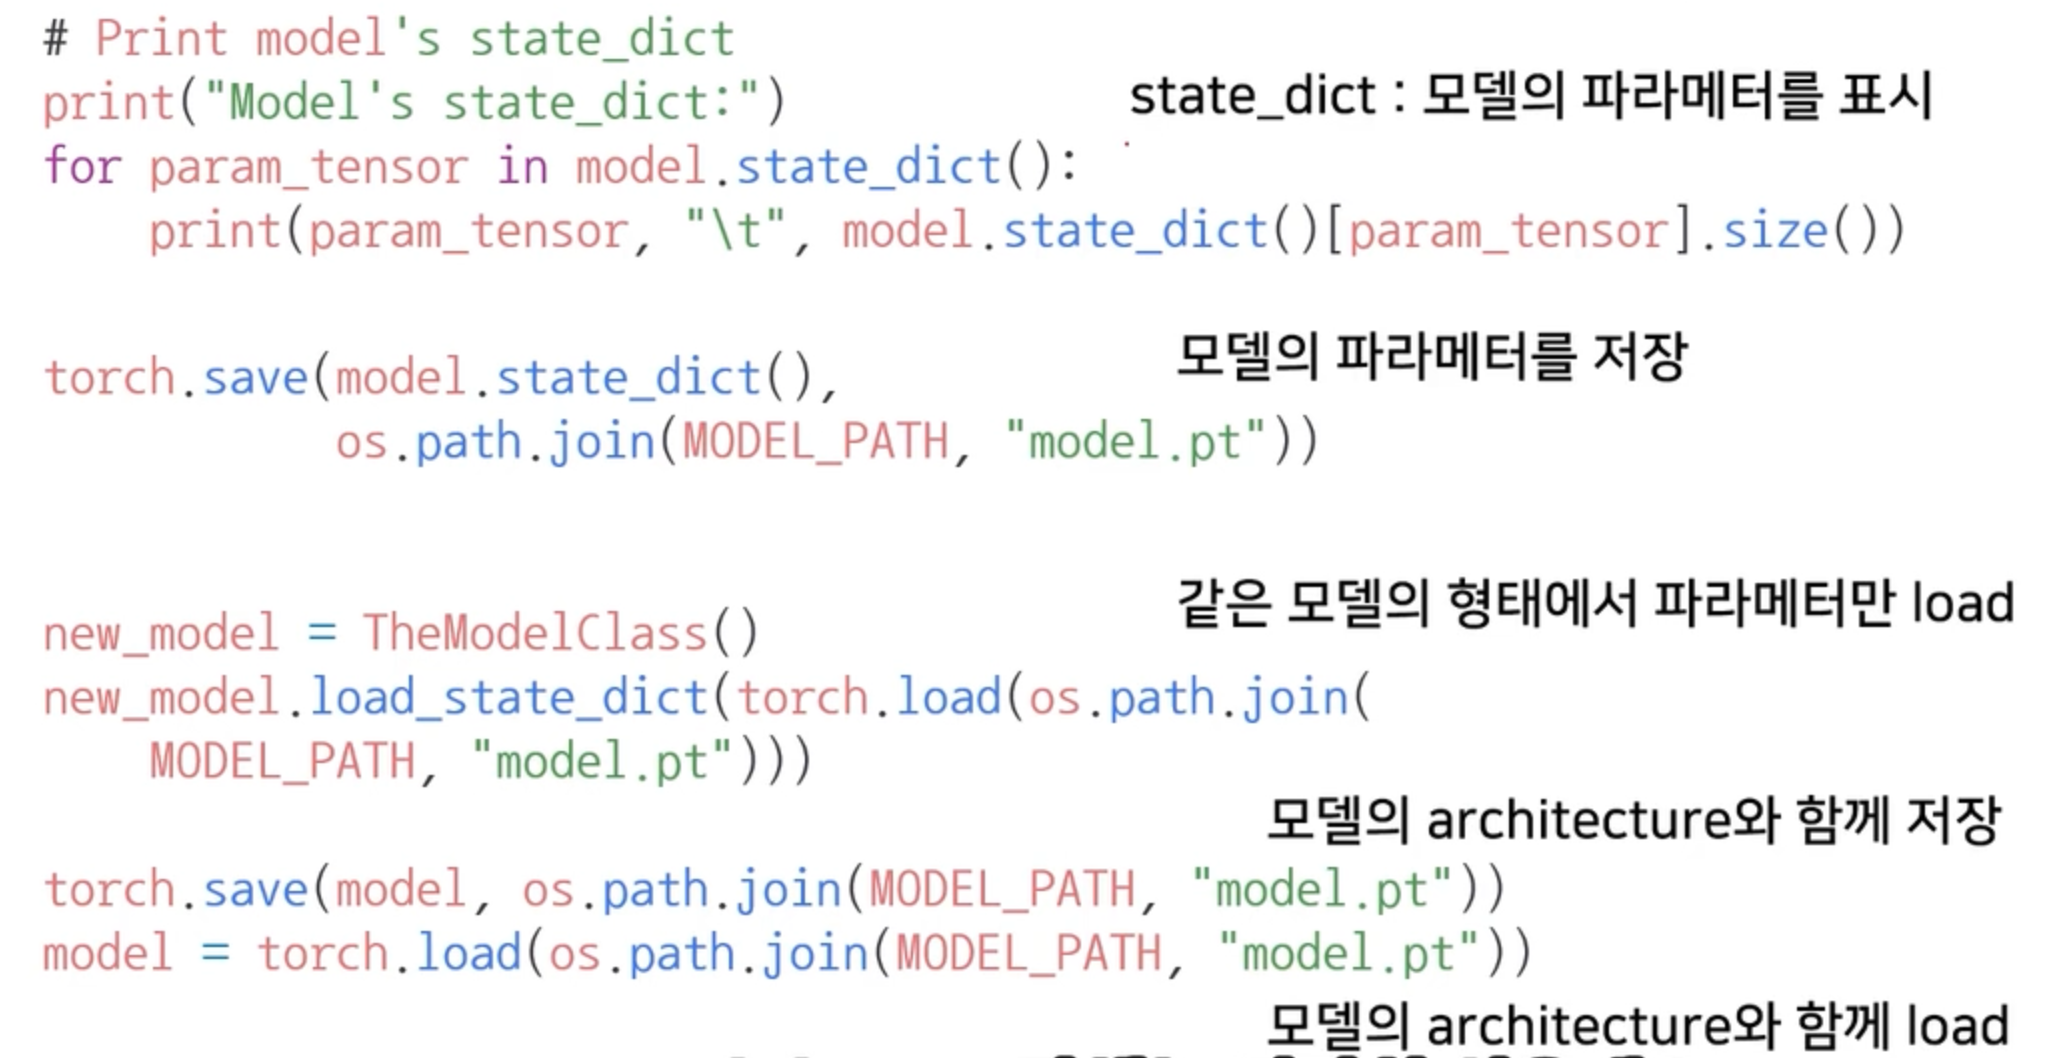

- stats_dict : 현재 모델의 상태를 확인
- torch.save시에 model.state_dict()로 세이브함으로써, 같은 모델의 형태에서만 파라미터 load를 진행! (load_state_dict 사용)
  - 만약 CNN의 파라미터를 저장했다면, 동일한 아키텍쳐를 가지는 CNN 모델에 파라미터를 로드
- 모델 자체를 넘겨줄 때 model의 아키텍쳐까지 포함하여 전체로 넘겨줄 수도 있다.

## Checkpoints
- 학습의 중간 결과를 저장하여 최선의 결과를 선택
- earlystopping 기법 사용시 이전 학습의 결과물을 저장
- loss와 metric 값을 지속적으로 확인 저장
- 일반적으로 epoch, loss, metric을 함께 저장하여 확인
- colab에서 지속적인 학습을 위해 필요

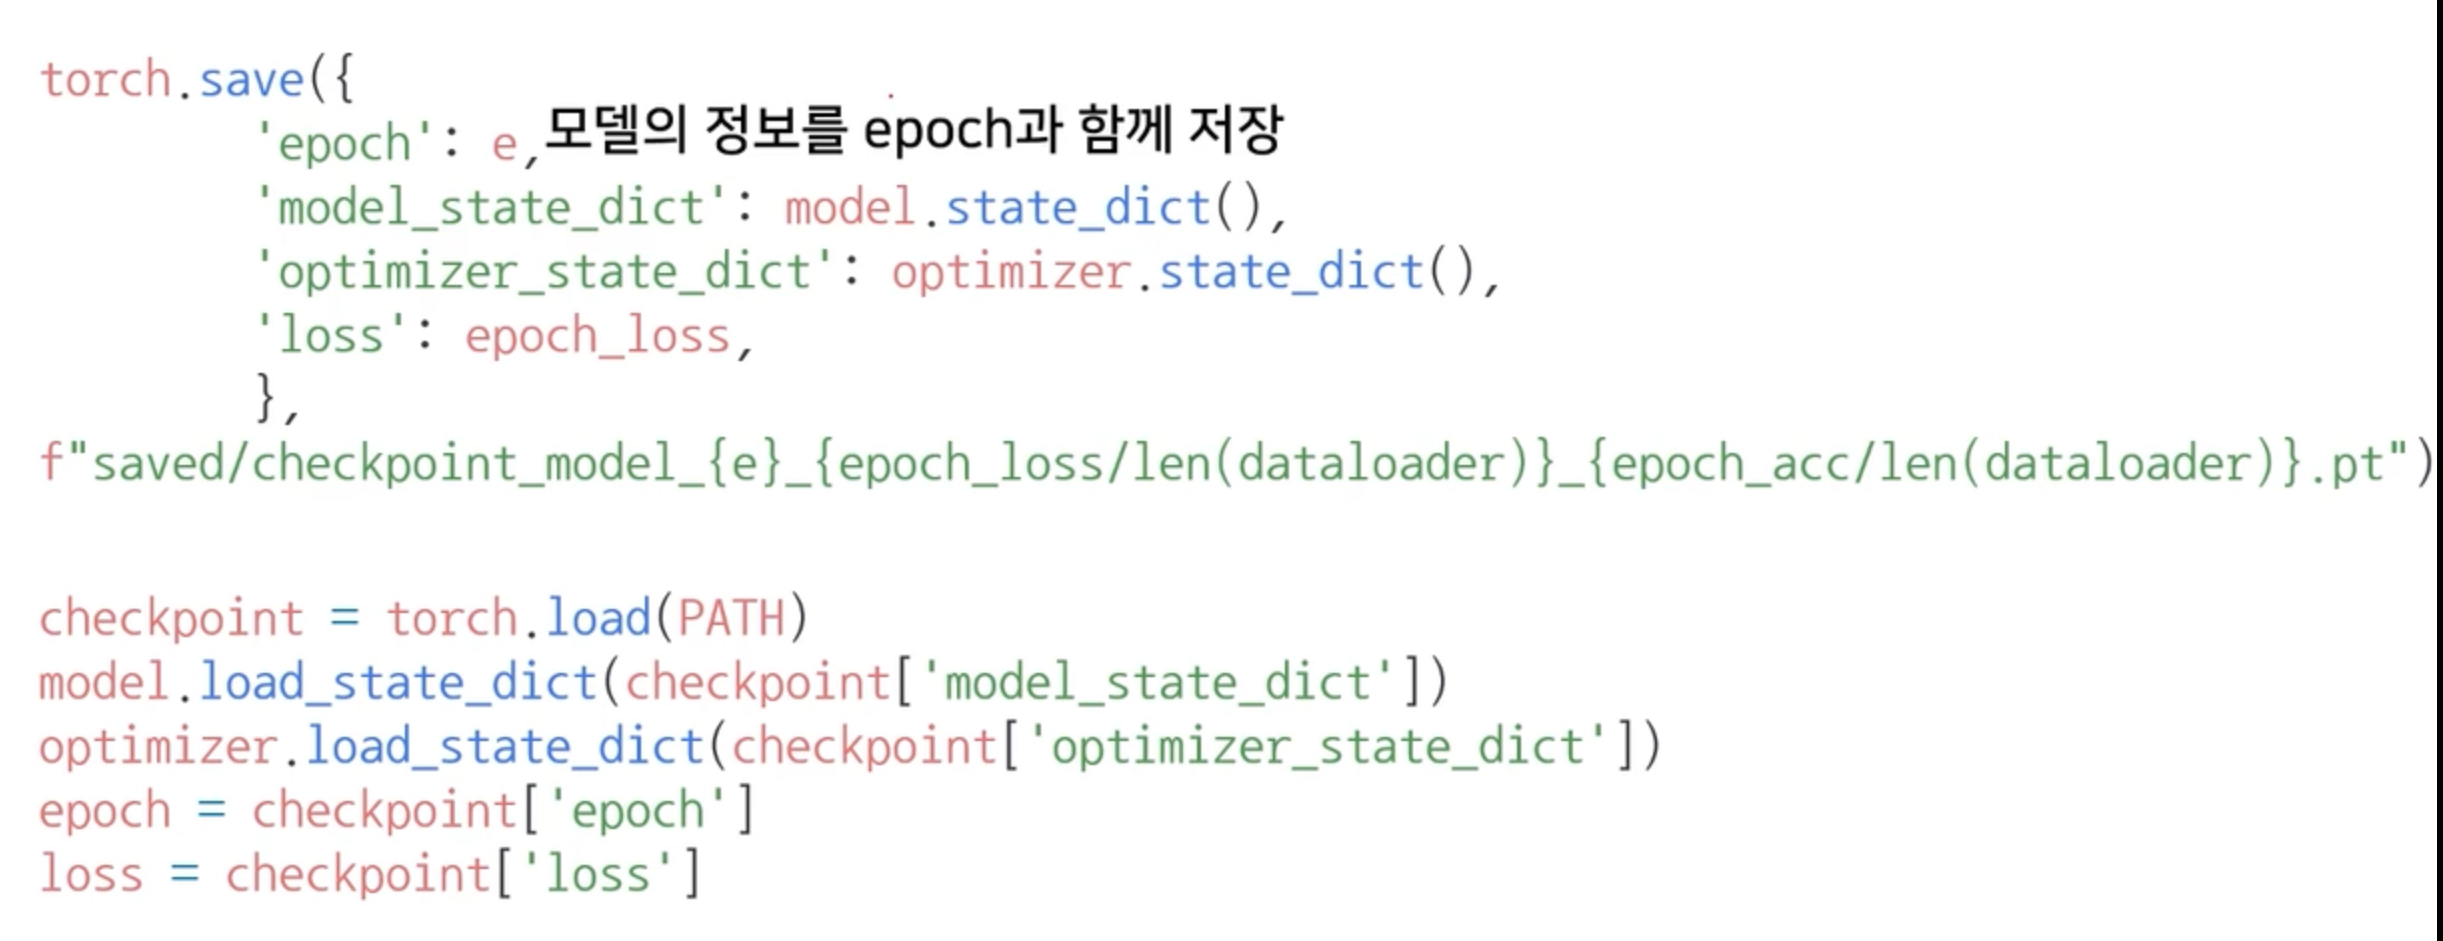

### Pretrained model & Transfer learning

- 다른 데이터셋으로 만든 모델을 현재 데이터에 적용
- 일반적으로 대용량 데이터셋으로 만들어진 모델의 성능이 높다 : 가장 일반적인 학습 기법
- 백본 (backbone architecture)가 잘 학습된 모델에서 일부분만 변경하여 학습을 수행함
- 보통 TorchVision에서 다양한 모델을 제공한다

#### 추가
이미 다른 데이터로 학습을 시킨 부분은 멈추고, 내 데이터에서 원하는 layer 부분만 학습
- Transfer Learning이란, 잘알려진 pretrainted model을 이용해서 마지막 final layer만 수정해서 본인의 목적에 맞게 다시 학습 시키는 방법이다. 혹자는 Fine tuning이라 부르기도 한다. 본인 보유한 데이터 양에 따라 어느 정도 레이어들을 수정할지가 결정된다. 보통 `앞부분 layer는 추상적인 feature를 extraction하는 레이어이므로 건들지 않고 마지막 레이러들을 수정`한다. https://goodtogreate.tistory.com/entry/%ED%95%99%EC%8A%B5-%EB%AA%A8%EB%8D%B8%EC%9D%98-%EC%9E%AC%EC%82%AC%EC%9A%A9-Transfer-Learning
- 내 모델은 forgetting이 되어서 성능이 내려갔다기 보다는 training data자체가 워낙 작아서, 이미 한epoch만에 수렴을 했고, 계속 overfitting되었던게 문제였던것같다. https://soyoung97.github.io/pytorch-model-%EC%9D%BC%EB%B6%80-layer%EB%A7%8C-freeze-%ED%95%98%EA%B8%B0/

### Freezing
- pretrained model을 활용시 모델의 일부분을 frozen 시킴
  - 특정 위치 파라미터까지만 사용하기 위해 해당 더 이상 파라미터들의 값이 바뀌지 않도록 하는 것을 frozen 했다고 함
- 역미분이 전체적으로 일어나는 것이 아닌, 일부 layer에서만 일어나도록 한다

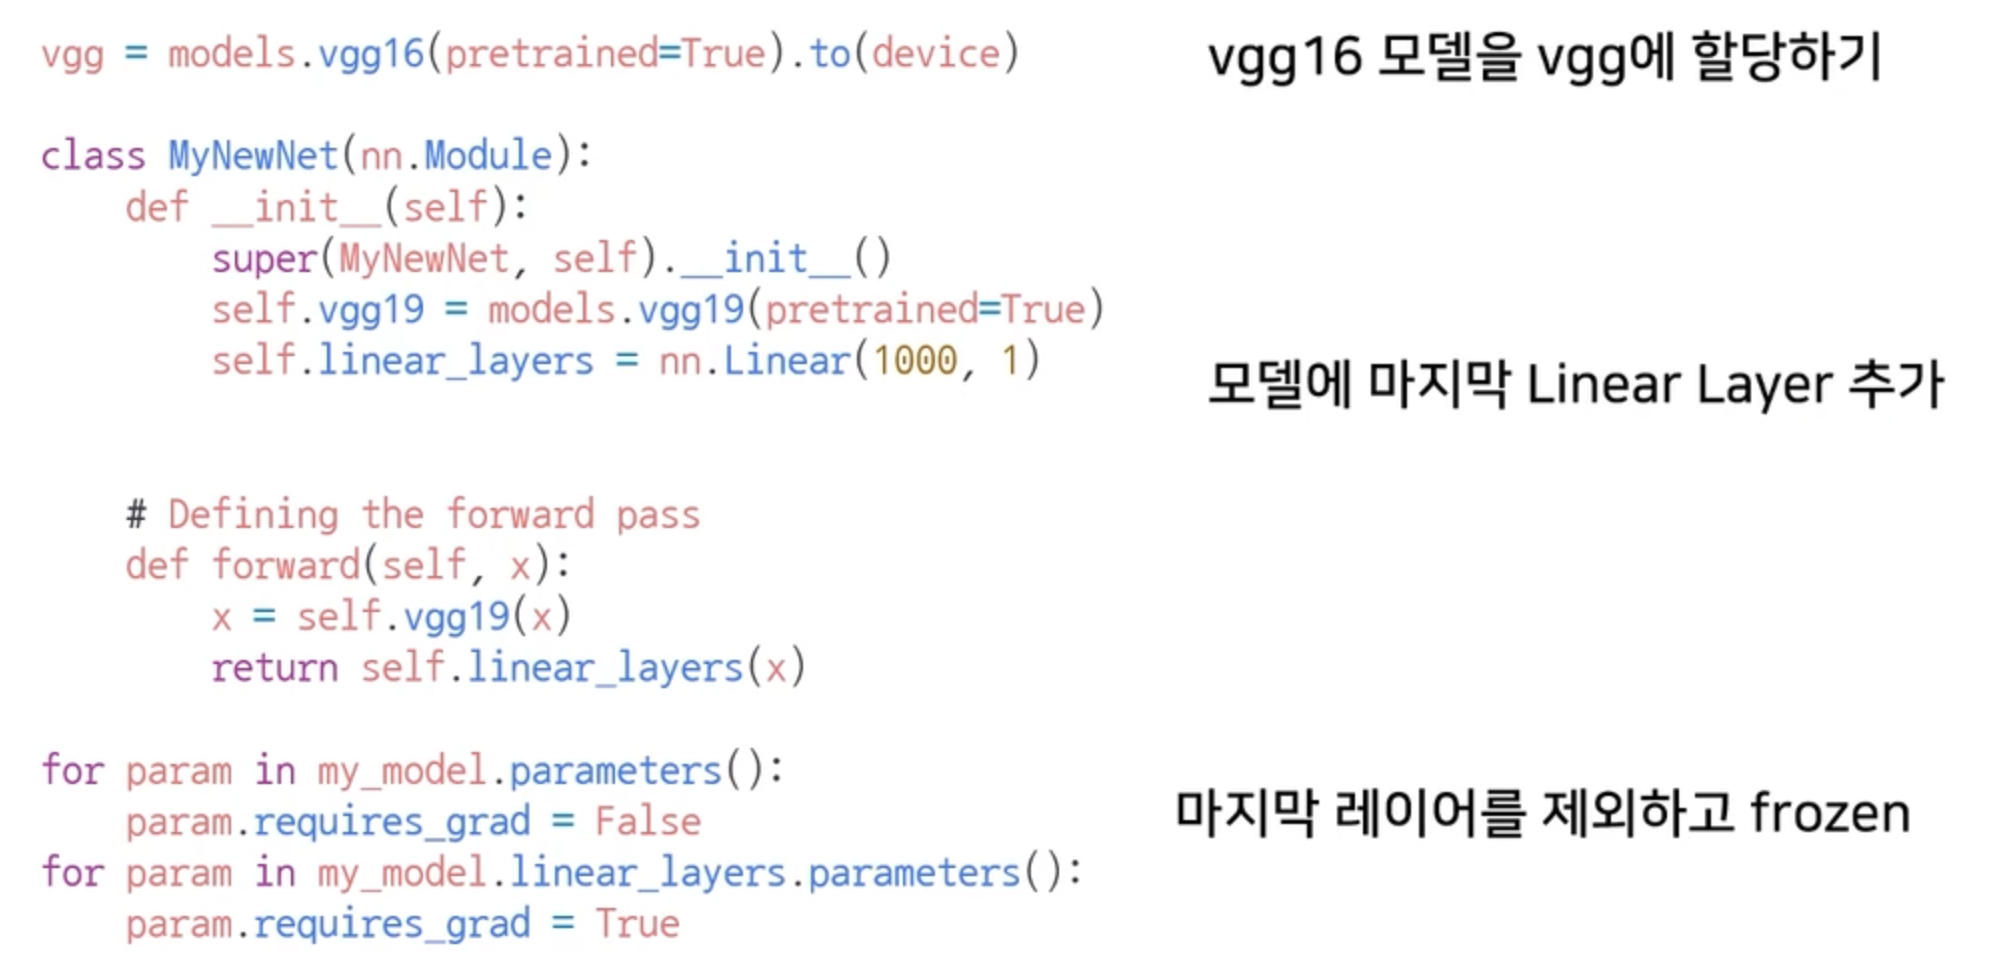

- reqiores_grad = False, frozen 시키고 싶은 부분만 false 부여

### Monitoring tools

#### Tensorboard
- Tensorflow의 프로젝트로 만들어진 시각화 도구
- 학습 그래프, 메트릭스, 학습 결과의 시각화 지원
- 파이토치도 연결 가능! -> DL 시각화 핵심 도구

저장할 수 있는 값
- scalar : metric 등 상수 값의 연속을 표시
  - 보통 밑은 epoch 또는 시간, 위는 scalar 값을 해서 그래프로 표시를 해주는게 일반적이다
- graph : 모델의 computational graph 표시
- histogram : weight 값 등의 분포를 표현
- image, txt : 예측 값과 실제 값을 비교 표시
- mesh : 3D 형태의 데이터를 표현하는 도구

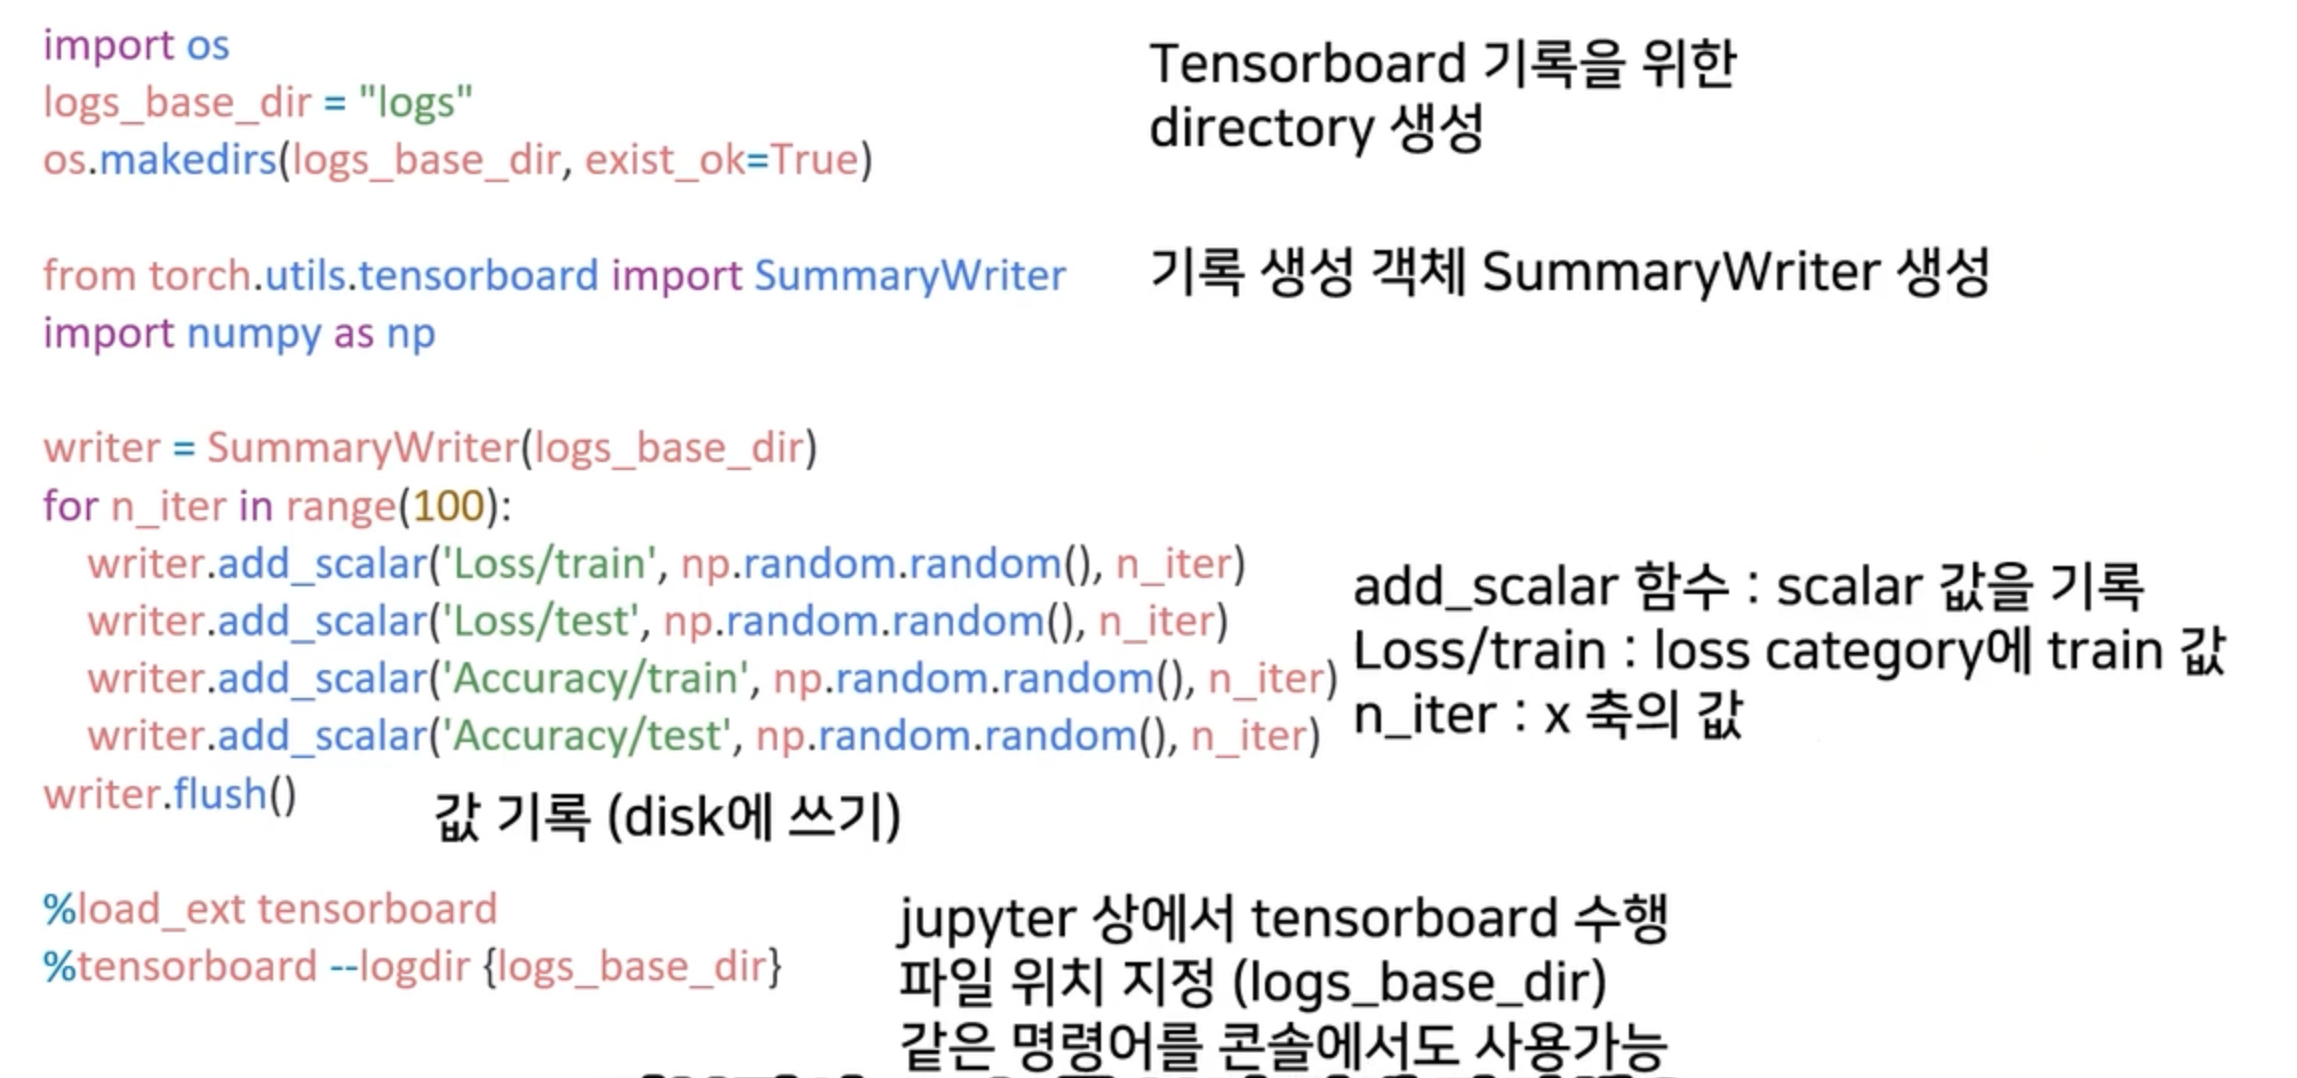

iteration가 증가하면서 add_scalar로 값을 추가해주게 된다

tensorboard를 띄우는 두 가지 방법
1. tensorboard를 깔고, tensorboard -- logdir의 경로만 지정해준다면 tensorboard가 6006의 포트로 자동 생성이 된다
2. load_ext tensorboard

#### Weight & Biases
- 머신러닝 실험을 원활히 지원하기 위한 상용도구
- 협업, code versioning, 실험 결과 기록 등 제공
- MLOps의 대표적인 툴로 저변 확대 중

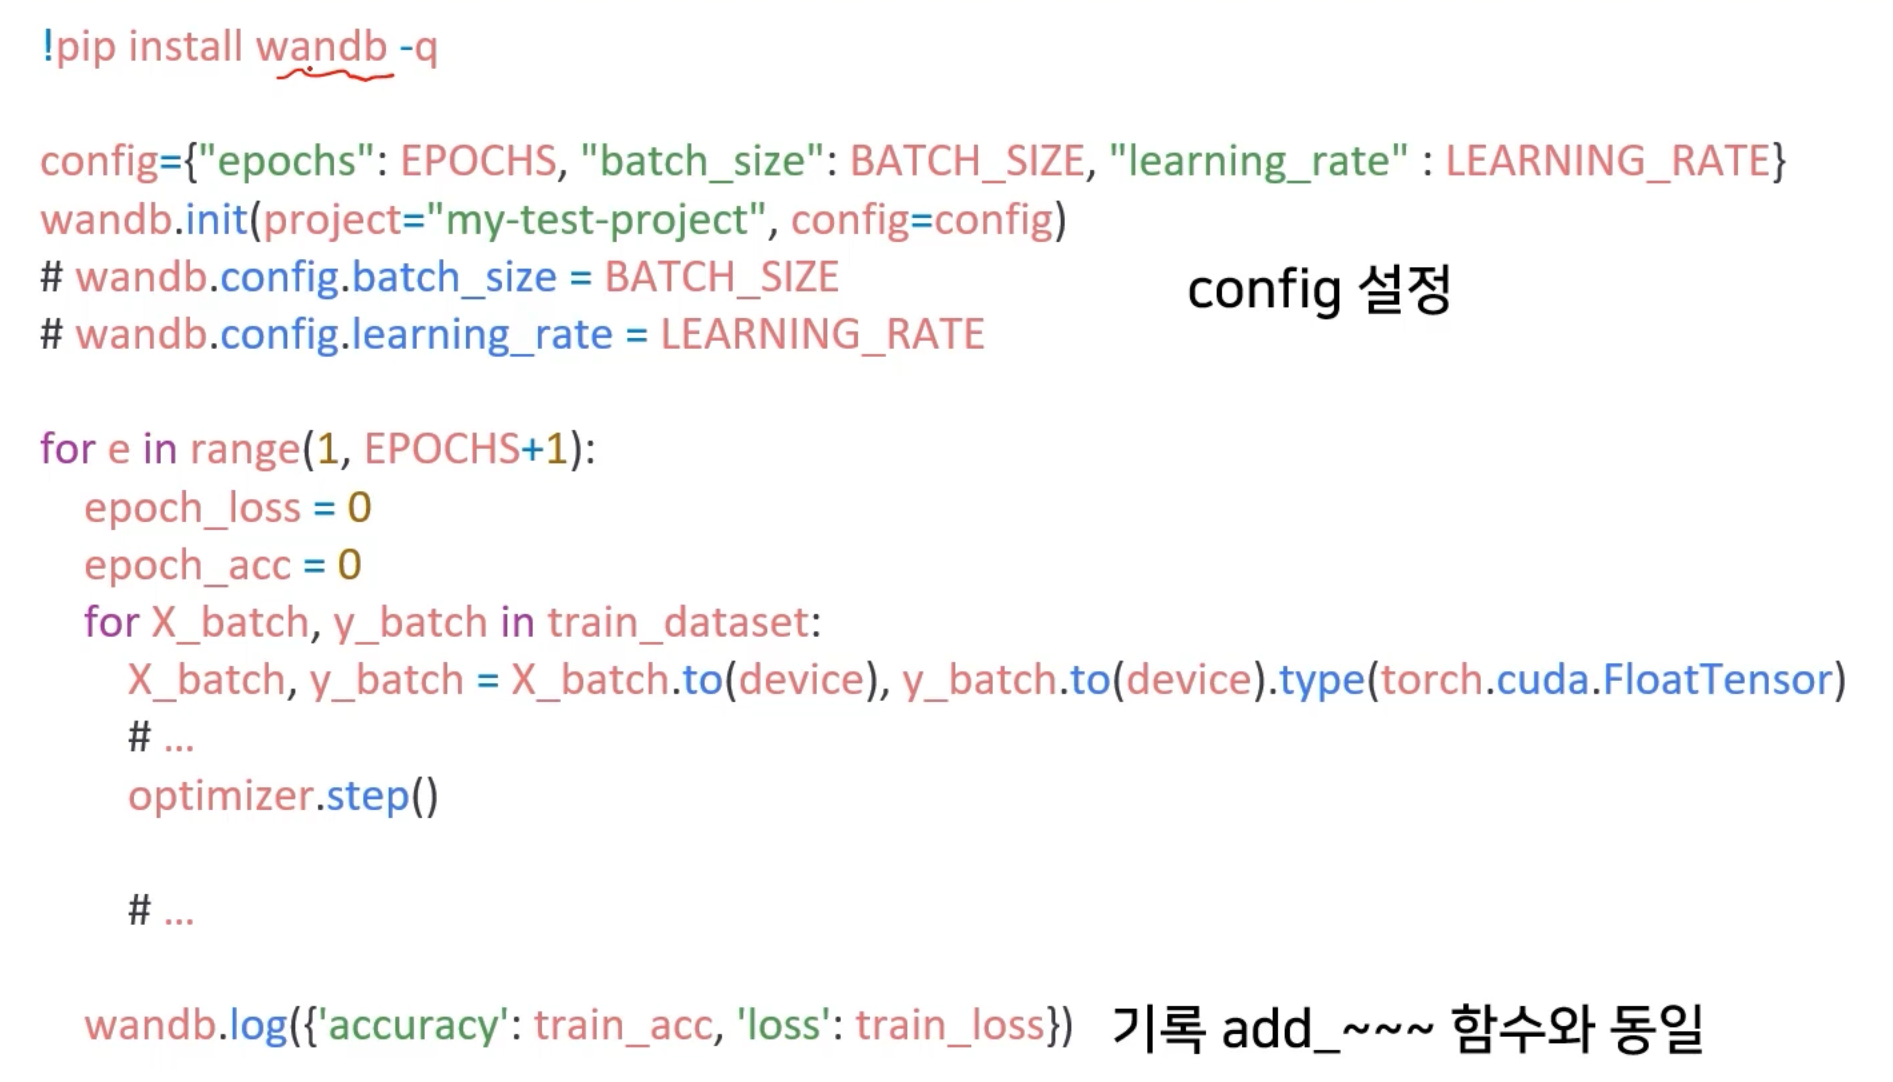

- tensorboard에서 add를 사용하는 것과 동일하다!